<a href="https://colab.research.google.com/github/anggrainidifa04/data-analisis-covid-19/blob/main/olah_data_kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/data_covid.ipynb.csv")

In [65]:
# melihat 5 data teratas
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [66]:
# Melihat informasi umum (tipe data, missing value)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [67]:
# statistik deskriptif
df.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [68]:
# Mengecek apakah ada nilai kosong
df.isnull().sum()

,0
Date,0
State,181
Region,0
Confirmed,0
Deaths,0
Recovered,0


In [69]:
# Jumlah data unik di setiap kolom
for col in df.columns:
    print(f"{col} → {df[col].nunique()} unique values")

Date → 1 unique values
State → 137 unique values
Region → 187 unique values
Confirmed → 282 unique values
Deaths → 142 unique values
Recovered → 195 unique values


In [70]:
# Lihat distribusi region (negara)
df['Region'].value_counts().head(10)

,count
Region,
US,58
Mainland China,31
Canada,15
UK,11
France,11
Australia,8
Netherlands,5
Denmark,3
Angola,1


In [71]:
# 1. Hapus baris yang semua nilainya kosong
df.dropna(how='all', inplace=True)

# 2. Isi kolom kosong dengan 0 untuk kolom numerik
num_cols = ['Confirmed', 'Deaths', 'Recovered']
for col in num_cols:
    df[col].fillna(0, inplace=True)

# 3. Hapus kolom State (jika kosong semua)
if df['State'].isnull().sum() == len(df):
    df.drop(columns=['State'], inplace=True)

# 4. Konversi kolom Date ke format datetime
df['Date'] = pd.to_datetime(df['Date'])

# 5. CEK HASIL CLEANING
print("Jumlah nilai kosong setelah cleaning:")
print(df.isnull().sum())
print("\nJumlah baris dan kolom data:", df.shape)
print("\n5 baris pertama setelah cleaning:")
df.head()

Jumlah nilai kosong setelah cleaning:
Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

Jumlah baris dan kolom data: (321, 6)

5 baris pertama setelah cleaning:


,Date,State,Region,Confirmed,Deaths,Recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252
1,2020-04-29,NaN,Albania,766,30,455
2,2020-04-29,NaN,Algeria,3848,444,1702
3,2020-04-29,NaN,Andorra,743,42,423
4,2020-04-29,NaN,Angola,27,2,7


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       321 non-null    datetime64[ns]
 1   State      140 non-null    object        
 2   Region     321 non-null    object        
 3   Confirmed  321 non-null    int64         
 4   Deaths     321 non-null    int64         
 5   Recovered  321 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 15.2+ KB


In [73]:
# Summing only numeric columns
df[['Confirmed', 'Deaths', 'Recovered']].sum()

,0
Confirmed,3193886
Deaths,227638
Recovered,972719


In [74]:
# Membuat fitur baru: Tingkat Kematian & Kesembuhan
df['Death_Rate'] = (df['Deaths'] / df['Confirmed']) * 100
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed']) * 100

# Tangani nilai NaN dan Infinity (misal jika Confirmed = 0)
df.replace([np.inf, -np.inf], 0, inplace=True)
df.fillna(0, inplace=True)

# Bulan & Tahun dari kolom tanggal (for trend analysis later)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# Check the result
print("5 first rows with new features:")
df[['Region', 'Confirmed', 'Deaths', 'Recovered', 'Death_Rate', 'Recovery_Rate', 'Year', 'Month']].head()

5 first rows with new features:


,Region,Confirmed,Deaths,Recovered,Death_Rate,Recovery_Rate,Year,Month
0,Afghanistan,1939,60,252,3.094379,12.996390,2020,April
1,Albania,766,30,455,3.916449,59.399478,2020,April
2,Algeria,3848,444,1702,11.538462,44.230769,2020,April
3,Andorra,743,42,423,5.652759,56.931359,2020,April
4,Angola,27,2,7,7.407407,25.925926,2020,April


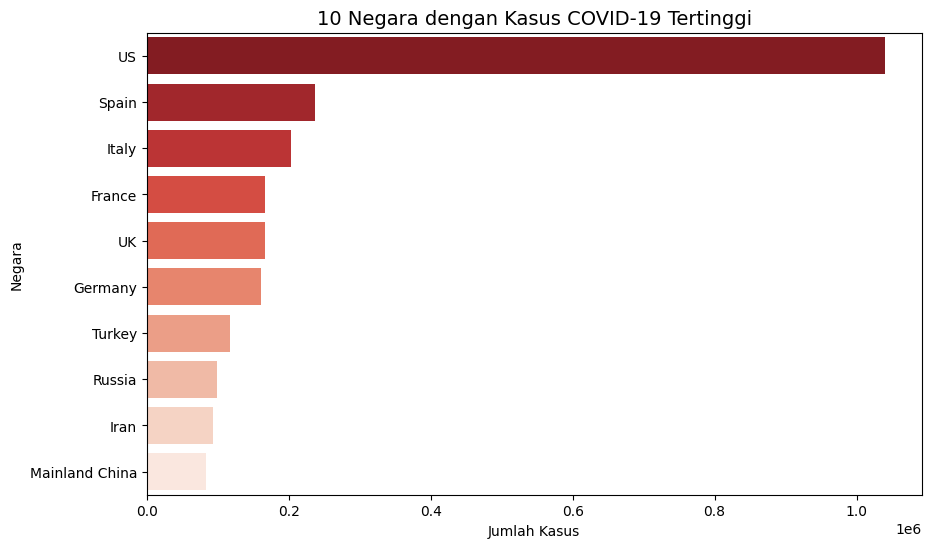

In [75]:
# kasus covit tertinggi

plt.figure(figsize=(10,6))
top_confirmed = df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_confirmed.values, y=top_confirmed.index, palette='Reds_r')
plt.title("10 Negara dengan Kasus COVID-19 Tertinggi", fontsize=14)
plt.xlabel("Jumlah Kasus")
plt.ylabel("Negara")
plt.show()

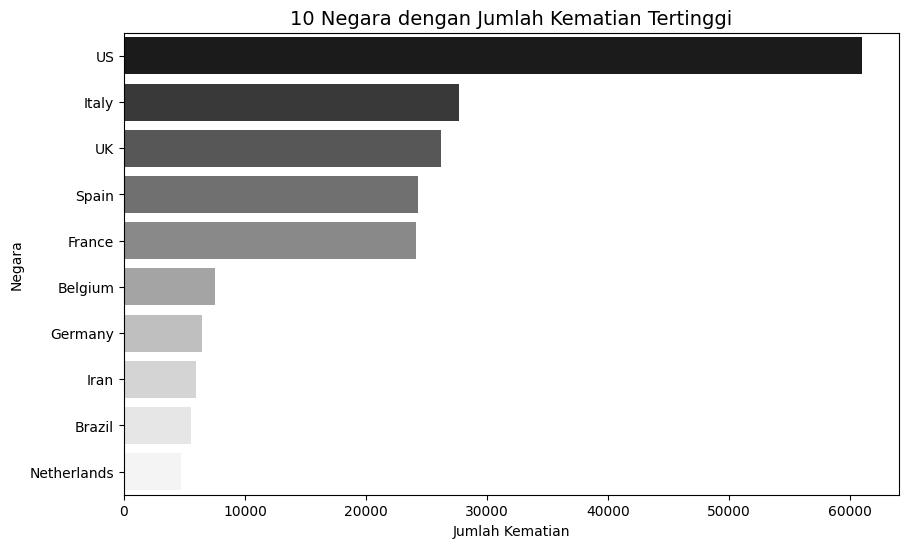

In [76]:
# negara dngn jumlah kemtian tertinggi

plt.figure(figsize=(10,6))
top_deaths = df.groupby('Region')['Deaths'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_deaths.values, y=top_deaths.index, palette='Greys_r')
plt.title("10 Negara dengan Jumlah Kematian Tertinggi", fontsize=14)
plt.xlabel("Jumlah Kematian")
plt.ylabel("Negara")
plt.show()


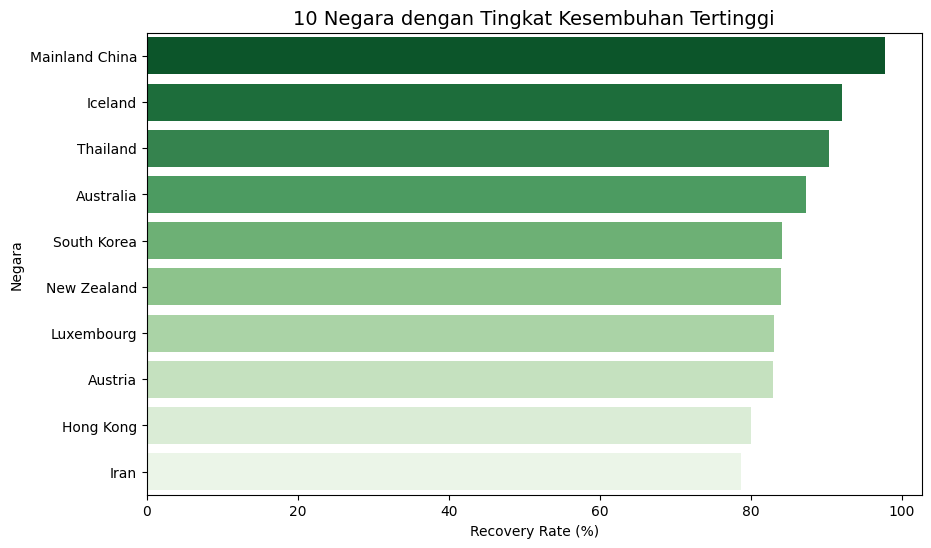

In [77]:
# negara dengan tingkat kesembuhan tertinggi

df_recovery = df[df['Confirmed'] > 1000]
top_recovery = df_recovery.groupby('Region')['Recovery_Rate'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_recovery.values, y=top_recovery.index, palette='Greens_r')
plt.title("10 Negara dengan Tingkat Kesembuhan Tertinggi", fontsize=14)
plt.xlabel("Recovery Rate (%)")
plt.ylabel("Negara")
plt.show()


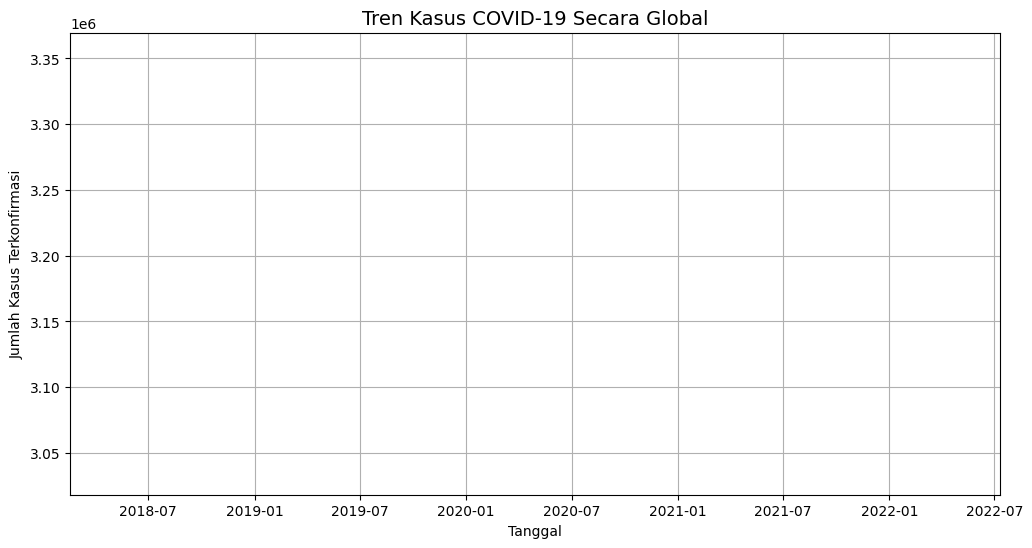

In [78]:
# trn kasus covid secraa global ( tidak ada karna kasus hanya terjaid pada satu hari)
plt.figure(figsize=(12,6))
trend = df.groupby('Date')['Confirmed'].sum().reset_index()

plt.plot(trend['Date'], trend['Confirmed'], color='blue', linewidth=2)
plt.title("Tren Kasus COVID-19 Secara Global", fontsize=14)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kasus Terkonfirmasi")
plt.grid(True)
plt.show()



In [79]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered,Death_Rate,Recovery_Rate,Year,Month
0,2020-04-29,0,Afghanistan,1939,60,252,3.094379,12.996390,2020,April
1,2020-04-29,0,Albania,766,30,455,3.916449,59.399478,2020,April
2,2020-04-29,0,Algeria,3848,444,1702,11.538462,44.230769,2020,April
3,2020-04-29,0,Andorra,743,42,423,5.652759,56.931359,2020,April
4,2020-04-29,0,Angola,27,2,7,7.407407,25.925926,2020,April


In [80]:
total_confirmed = df['Confirmed'].sum()
total_deaths = df['Deaths'].sum()
total_recovered = df['Recovered'].sum()

print("Total Kasus Terkonfirmasi :", total_confirmed)
print("Total Kematian :", total_deaths)
print("Total Sembuh :", total_recovered)


Total Kasus Terkonfirmasi : 3193886
Total Kematian : 227638
Total Sembuh : 972719


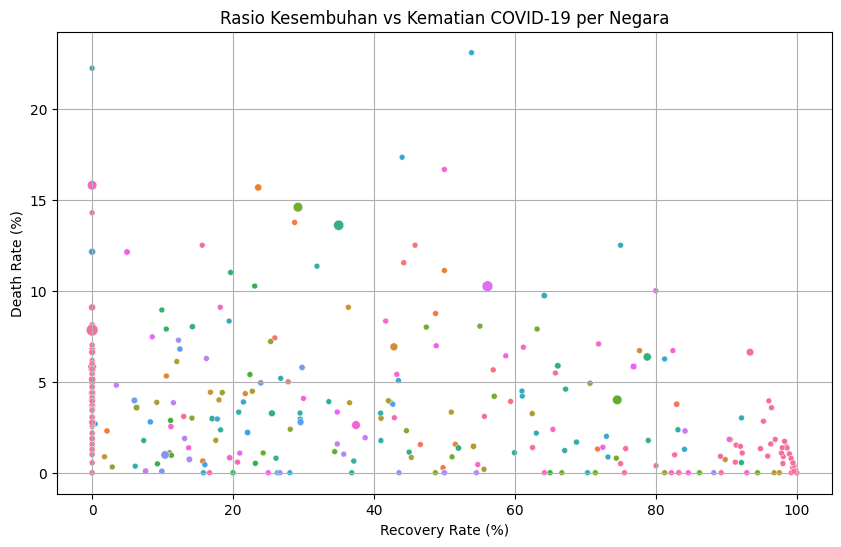

In [81]:
df['Death_Rate'] = (df['Deaths'] / df['Confirmed']) * 100
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed']) * 100

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Recovery_Rate', y='Death_Rate', size='Confirmed', hue='Region', legend=False)
plt.title("Rasio Kesembuhan vs Kematian COVID-19 per Negara")
plt.xlabel("Recovery Rate (%)")
plt.ylabel("Death Rate (%)")
plt.grid(True)
plt.show()


In [82]:
# Hindari pembagian dengan nol
df['Death_Rate'] = (df['Deaths'] / df['Confirmed'].replace(0, np.nan)) * 100
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed'].replace(0, np.nan)) * 100
df['Active_Case'] = df['Confirmed'] - (df['Recovered'] + df['Deaths'])

# Isi NaN dengan 0 agar aman
df.fillna(0, inplace=True)

df[['Region', 'Confirmed', 'Deaths', 'Recovered', 'Death_Rate', 'Recovery_Rate', 'Active_Case']].head(10)

,Region,Confirmed,Deaths,Recovered,Death_Rate,Recovery_Rate,Active_Case
0,Afghanistan,1939,60,252,3.094379,12.996390,1627
1,Albania,766,30,455,3.916449,59.399478,281
2,Algeria,3848,444,1702,11.538462,44.230769,1702
3,Andorra,743,42,423,5.652759,56.931359,278
4,Angola,27,2,7,7.407407,25.925926,18
5,Antigua and Barbuda,24,3,11,12.500000,45.833333,10
6,Argentina,4285,214,1192,4.994166,27.817970,2879
7,Armenia,1932,30,900,1.552795,46.583851,1002
8,Austria,15402,580,12779,3.765745,82.969744,2043
9,Azerbaijan,1766,23,1267,1.302378,71.744054,476


In [83]:
def risk_category(row):
    if row['Death_Rate'] > 5:
        return 'High Risk'
    elif row['Death_Rate'] > 1:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df['Risk_Level'] = df.apply(risk_category, axis=1)
df['Risk_Level'].value_counts()

,count
Risk_Level,
Moderate Risk,143
Low Risk,95
High Risk,83


In [84]:
# Visualisasi peta dunia (choropleth)
import plotly.express as px

fig = px.choropleth(
    df,
    locations="Region",
    locationmode="country names",
    color="Risk_Level",
    title="Peta Prediksi Tingkat Risiko COVID-19 ",
    color_discrete_map={
        'Low Risk': 'green',
        'Moderate Risk': 'orange',
        'High Risk': 'red'
    }
)
fig.show()

In [85]:
# Hindari pembagian dengan nol
df['Death_Rate'] = (df['Deaths'] / df['Confirmed'].replace(0, np.nan)) * 100
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed'].replace(0, np.nan)) * 100
df['Active_Case'] = df['Confirmed'] - (df['Recovered'] + df['Deaths'])

# Isi NaN dengan 0 agar aman
df.fillna(0, inplace=True)

df[['Region', 'Confirmed', 'Deaths', 'Recovered', 'Death_Rate', 'Recovery_Rate', 'Active_Case']].head(10)


,Region,Confirmed,Deaths,Recovered,Death_Rate,Recovery_Rate,Active_Case
0,Afghanistan,1939,60,252,3.094379,12.996390,1627
1,Albania,766,30,455,3.916449,59.399478,281
2,Algeria,3848,444,1702,11.538462,44.230769,1702
3,Andorra,743,42,423,5.652759,56.931359,278
4,Angola,27,2,7,7.407407,25.925926,18
5,Antigua and Barbuda,24,3,11,12.500000,45.833333,10
6,Argentina,4285,214,1192,4.994166,27.817970,2879
7,Armenia,1932,30,900,1.552795,46.583851,1002
8,Austria,15402,580,12779,3.765745,82.969744,2043
9,Azerbaijan,1766,23,1267,1.302378,71.744054,476


In [86]:
def risk_category(row):
    if row['Death_Rate'] > 5:
        return 'High Risk'
    elif row['Death_Rate'] > 1:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df['Risk_Level'] = df.apply(risk_category, axis=1)
df['Risk_Level'].value_counts()


,count
Risk_Level,
Moderate Risk,143
Low Risk,95
High Risk,83


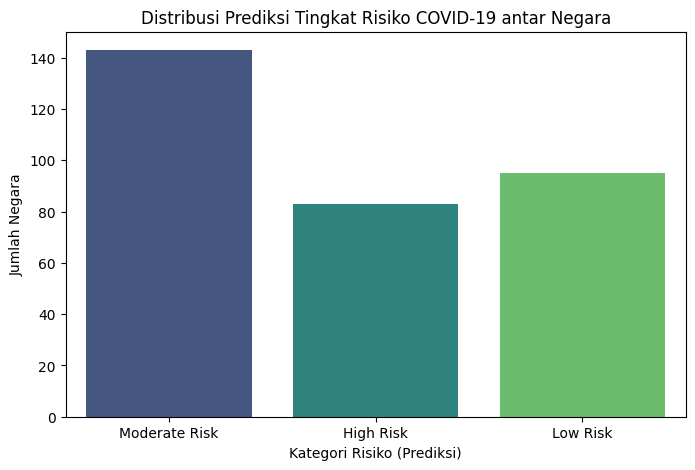

In [87]:
# Hitung jumlah negara di tiap kategori risiko
plt.figure(figsize=(8,5))
sns.countplot(x='Risk_Level', data=df, palette='viridis')
plt.title('Distribusi Prediksi Tingkat Risiko COVID-19 antar Negara')
plt.xlabel('Kategori Risiko (Prediksi)')
plt.ylabel('Jumlah Negara')
plt.show()

In [88]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Region_encoded'] = le.fit_transform(df['Region'])
df['Risk_Level_encoded'] = le.fit_transform(df['Risk_Level'])

df_model = df[['Confirmed', 'Deaths', 'Recovered', 'Active_Case', 'Death_Rate', 'Recovery_Rate', 'Region_encoded', 'Risk_Level_encoded']]
df_model.head()


,Confirmed,Deaths,Recovered,Active_Case,Death_Rate,Recovery_Rate,Region_encoded,Risk_Level_encoded
0,1939,60,252,1627,3.094379,12.996390,0,2
1,766,30,455,281,3.916449,59.399478,1,2
2,3848,444,1702,1702,11.538462,44.230769,2,0
3,743,42,423,278,5.652759,56.931359,3,0
4,27,2,7,18,7.407407,25.925926,4,0


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_model.drop(columns=['Risk_Level_encoded'])
y = df_model['Risk_Level_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi Model: 1.0

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        32

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



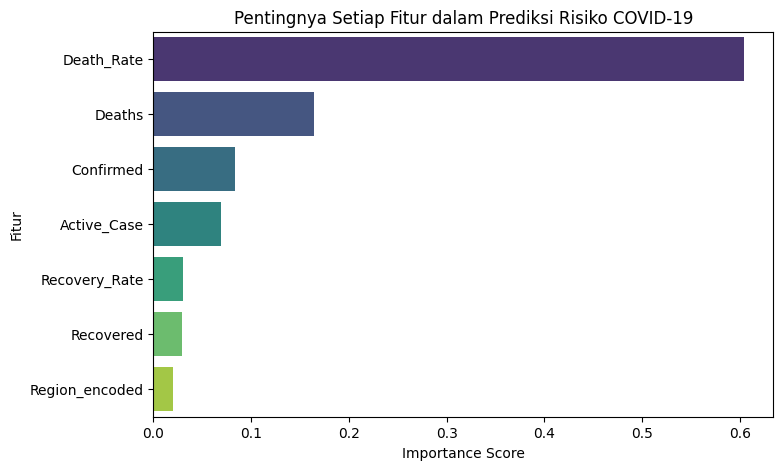

In [90]:
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importance.values, y=importance.index, palette='viridis')
plt.title("Pentingnya Setiap Fitur dalam Prediksi Risiko COVID-19")
plt.xlabel("Importance Score")
plt.ylabel("Fitur")
plt.show()


In [91]:
from sklearn.model_selection import cross_val_score

# Kita pakai model RandomForest yang sudah dilatih sebelumnya
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Hasil Cross Validation untuk Random Forest:")
print(cv_scores)
print("Rata-rata Akurasi Cross Validation:", cv_scores.mean())


Hasil Cross Validation untuk Random Forest:
[0.98461538 1.         0.984375   1.         1.        ]
Rata-rata Akurasi Cross Validation: 0.993798076923077



Perbandingan Akurasi Beberapa Algoritma:

Random Forest: 1.0000
Decision Tree: 1.0000
Logistic Regression: 1.0000
Naive Bayes: 0.6790
KNN: 0.5185
SVM: 0.4198


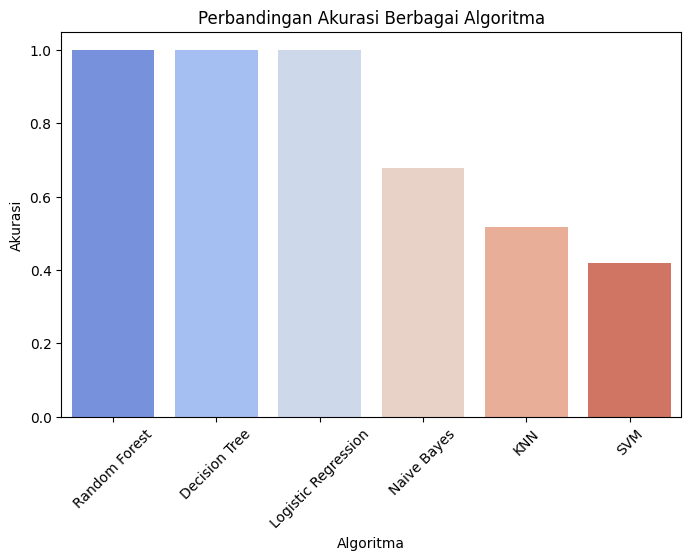


 Model terbaik untuk data COVID adalah: Random Forest dengan akurasi 1.0000


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Daftar model yang akan dibandingkan
models = [
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(random_state=42))
]

results = {}

print("\nPerbandingan Akurasi Beberapa Algoritma:\n")
for name, clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Visualisasi perbandingan akurasi
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")
plt.title("Perbandingan Akurasi Berbagai Algoritma")
plt.xlabel("Algoritma")
plt.ylabel("Akurasi")
plt.xticks(rotation=45)
plt.show()

# Tampilkan model dengan akurasi tertinggi
best_model = max(results, key=results.get)
print(f"\n Model terbaik untuk data COVID adalah: {best_model} dengan akurasi {results[best_model]:.4f}")

In [93]:
# Make predictions on the entire dataset
y_pred_all = model.predict(X)

# Add the predicted risk level to the original DataFrame
df['Predicted_Risk_Label'] = le.inverse_transform(y_pred_all)

# Ringkasan hasil
print("=== RINGKASAN HASIL AKHIR ===")
print(f"Model terbaik: {best_model}")
print(f"Jumlah total data: {len(df)}")
print("Distribusi prediksi risiko:")
print(df['Predicted_Risk_Label'].value_counts())

=== RINGKASAN HASIL AKHIR ===
Model terbaik: Random Forest
Jumlah total data: 321
Distribusi prediksi risiko:
Predicted_Risk_Label
Moderate Risk    143
Low Risk          95
High Risk         83
Name: count, dtype: int64
